<h2>Logistic Regression - Predicting survival on the Titanic</h2>
<p style="color:blue">
Import pandas, Sci Toolkit (sklearn) and libraries for implementing logistic regression model and measuring performance
</p>

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

%pylab inline

Populating the interactive namespace from numpy and matplotlib


<p style="color:blue">
Read Titanic training data into memory
</p>

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

<p style="color:blue">
Create new empty dataframe. Put the following 5 independent variables namely: Pclass, Sex, Age, SibSp, and Parch
</p>

In [4]:
X = pd.DataFrame()
X['pclass'] = df['Pclass']
X['sex'] = df['Sex']
X['age'] = df['Age']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']

<p style="color:blue">
Survived will be the dependent variable y
</p>

In [5]:
y = df['Survived']

<p style="color:blue">
Convert Sex from categorical to numeric using get_dummies and one hot encoding
</p>

In [6]:
X['sex'] = pd.get_dummies(X.sex)['female']

<p style="color:blue">
Convert Pclass from categorical to numeric using get_dummies and hot encoding to remove the first class column
</p>

In [7]:
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X = X.drop(['pclass_1', 'pclass'], axis=1)

<p style="color:blue">
Age has lots of missing values. Instead of skipping we will use average value to fill the missing values
</p>

In [8]:
avgAge = X['age'].mean()
X['age'] = X['age'].fillna(avgAge)

<p style="color:blue">
Let us look at X and its features
</p>

In [9]:
X

,sex,age,sibsp,parch,pclass_2,pclass_3
0,0,22.000000,1,0,0,1
1,1,38.000000,1,0,0,0
2,1,26.000000,0,0,0,1
3,1,35.000000,1,0,0,0
4,0,35.000000,0,0,0,1
5,0,29.699118,0,0,0,1
6,0,54.000000,0,0,0,0
7,0,2.000000,3,1,0,1
8,1,27.000000,0,2,0,1
9,1,14.000000,1,0,1,0


<p style="color:blue">
Scale the features of X
</p>

In [10]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

<p style="color:blue">
Build test and training sets
</p>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<p style="color:blue">
Build and run the Logistic Regression Model
</p>

In [12]:
model = LogisticRegression(penalty='l2', C=10)
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

<p style="color:blue">
Calculate Accuracy
</p>

In [13]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.82


<p style="color:blue">
Calculate Precision, Recall and AUC
</p>

In [14]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )

Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.73      0.77        74

avg / total       0.82      0.82      0.82       179



<p style="color:blue">
Plot ROC curve
</p>

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

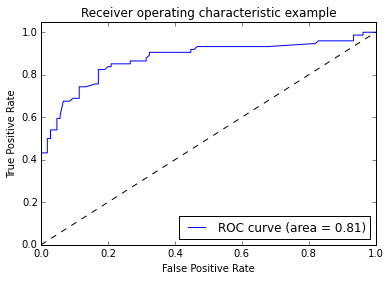

In [16]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()